In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
train =  pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test =  pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [4]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
df2 = train.groupby(['target'])['target'].count()
df2

target
0    4342
1    3271
Name: target, dtype: int64

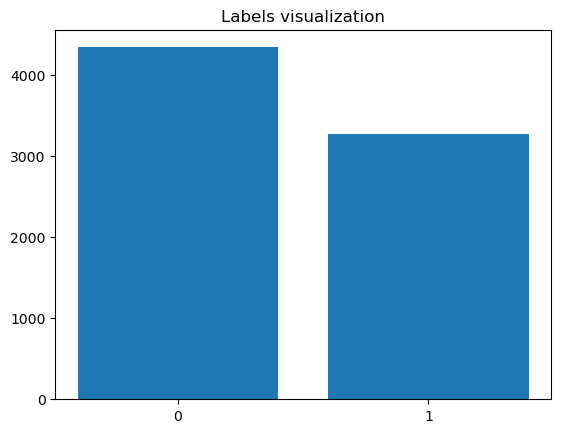

In [6]:
fig, ax = plt.subplots()
labels = ['0','1']
counts = [df2[0], df2[1]]
ax.bar(labels, counts )
ax.set_title('Labels visualization')
plt.show()

# **Data preprocessing**

In [7]:
### Create features column
train["Features"] = train['keyword'].astype(str)+' '+train['location'].astype(str)+' '+train['text'].astype(str)
train

,id,keyword,location,text,target,Features
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,nan nan Our Deeds are the Reason of this #eart...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,nan nan Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,nan nan All residents asked to 'shelter in pla...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"nan nan 13,000 people receive #wildfires evacu..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,nan nan Just got sent this photo from Ruby #Al...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,nan nan Two giant cranes holding a bridge coll...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,nan nan @aria_ahrary @TheTawniest The out of c...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,nan nan M1.94 [01:04 UTC]?5km S of Volcano Haw...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,nan nan Police investigating after an e-bike c...


In [8]:
test["Features"] = test['keyword'].astype(str)+' '+test['location'].astype(str)+' '+test['text'].astype(str)
test

,id,keyword,location,text,Features
0,0,NaN,NaN,Just happened a terrible car crash,nan nan Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",nan nan Heard about #earthquake is different c...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","nan nan there is a forest fire at spot pond, g..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,nan nan Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,nan nan Typhoon Soudelor kills 28 in China and...
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,nan nan EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,nan nan Storm in RI worse than last hurricane....
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,nan nan Green Line derailment in Chicago http:...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,nan nan MEG issues Hazardous Weather Outlook (...


In [9]:
### Remove stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def remove_stopwords(text):
#     dtb = []
#     for i in range(len(df['Features'])):
#         word_tokens = word_tokenize(df.loc[i,'Features'])
#         filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#         dtb.append(filtered_sentence)
#     return dtb
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = ' '.join(filtered_sentence)
    return filtered_sentence
        

In [11]:
train['Features'] = train['Features'].apply(remove_stopwords)
test['Features'] = test['Features'].apply(remove_stopwords)

In [12]:
from sklearn.model_selection import train_test_split
X = train['Features']
Y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7955341506129597
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1318
           1       0.82      0.66      0.73       966

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.78      2284
weighted avg       0.80      0.80      0.79      2284



In [14]:
X_val = test['Features']
X_val

0                     nan nan happened terrible car crash
1       nan nan Heard # earthquake different cities , ...
2       nan nan forest fire spot pond , geese fleeing ...
3       nan nan Apocalypse lighting . # Spokane # wild...
4          nan nan Typhoon Soudelor kills 28 China Taiwan
                              ...                        
3258    nan nan EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFE...
3259    nan nan Storm RI worse last hurricane . city &...
3260    nan nan Green Line derailment Chicago http : /...
3261    nan nan MEG issues Hazardous Weather Outlook (...
3262    nan nan # CityofCalgary activated Municipal Em...
Name: Features, Length: 3263, dtype: object

In [15]:
y_val = nb.predict(X_val)
len(y_val)

3263

In [16]:
import csv
header = ['id','target']
with open('/kaggle/working/result.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i in range(len(y_val)):
        writer.writerow([str(test['id'][i]),str(y_val[i])])

In [17]:
val = pd.read_csv('/kaggle/working/result.csv')
val

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [18]:
type(val['target'][0])


numpy.int64

# **BERT**

On progress...
https://towardsdatascience.com/fine-tuning-bert-for-text-classification-54e7df642894

In [19]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from tabulate import tabulate
from tqdm import trange
import random

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [20]:
train =  pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test =  pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [21]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [22]:
### Create features column
train["Features"] = train['keyword'].astype(str)+' '+train['location'].astype(str)+' '+train['text'].astype(str)
test["Features"] = test['keyword'].astype(str)+' '+test['location'].astype(str)+' '+test['text'].astype(str)


In [23]:
text  = train['Features']
labels  = train['target']

In [24]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case = True
    )

In [25]:
def print_rand_sentence():
  '''Displays the tokens and respective IDs of a random text sample'''
  index = random.randint(0, len(text )-1)
  table = np.array([tokenizer.tokenize(text [index]), 
                    tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text [index]))]).T
  print(tabulate(table,
                 headers = ['Tokens', 'Token IDs'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence()

╒══════════╤═════════════╕
│ Tokens   │   Token IDs │
╞══════════╪═════════════╡
│ ann      │        5754 │
├──────────┼─────────────┤
│ ##ih     │       19190 │
├──────────┼─────────────┤
│ ##ila    │       11733 │
├──────────┼─────────────┤
│ ##ted    │        3064 │
├──────────┼─────────────┤
│ horse    │        3586 │
├──────────┼─────────────┤
│ ##mind   │       23356 │
├──────────┼─────────────┤
│ ,        │        1010 │
├──────────┼─────────────┤
│ mi       │        2771 │
├──────────┼─────────────┤
│ they     │        2027 │
├──────────┼─────────────┤
│ shall    │        4618 │
├──────────┼─────────────┤
│ be       │        2022 │
├──────────┼─────────────┤
│ ann      │        5754 │
├──────────┼─────────────┤
│ ##ih     │       19190 │
├──────────┼─────────────┤
│ ##ila    │       11733 │
├──────────┼─────────────┤
│ ##ted    │        3064 │
├──────────┼─────────────┤
│ and      │        1998 │
├──────────┼─────────────┤
│ all      │        2035 │
├──────────┼─────────────┤
│

In [26]:
token_id = []
attention_masks = []

def preprocessing(input_text, tokenizer):
  '''
  Returns <class transformers.tokenization_utils_base.BatchEncoding> with the following fields:
    - input_ids: list of token ids
    - token_type_ids: list of token type ids
    - attention_mask: list of indices (0,1) specifying which tokens should considered by the model (return_attention_mask = True).
  '''
  return tokenizer.encode_plus(
                        input_text,
                        add_special_tokens = True,
                        max_length = 32,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt'
                   )


for sample in text:
  encoding_dict = preprocessing(sample, tokenizer)
  token_id.append(encoding_dict['input_ids']) 
  attention_masks.append(encoding_dict['attention_mask'])



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [27]:
token_id

[tensor([[  101, 16660, 16660,  2256, 15616,  2024,  1996,  3114,  1997,  2023,
           1001,  8372,  2089, 16455,  9641,  2149,  2035,   102,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0]]),
 tensor([[  101, 16660, 16660,  3224,  2543,  2379,  2474,  6902,  3351, 21871,
           2243,  1012,  2710,   102,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0]]),
 tensor([[  101, 16660, 16660,  2035,  3901,  2356,  2000,  1005,  7713,  1999,
           2173,  1005,  2024,  2108, 19488,  2011,  3738,  1012,  2053,  2060,
          13982,  2030,  7713,  1999,  2173,  4449,  2024,  3517,   102,     0,
              0,     0]]),
 tensor([[  101, 16660, 16660,  2410,  1010,  2199,  2111,  4374,  1001,  3748,
          26332, 13982,  4449,  1999,  2662,   102,     0,     0,     0,     0,
              0,     0,     0,     0,  

In [28]:
token_id = torch.cat(token_id, dim = 0)
attention_masks = torch.cat(attention_masks, dim = 0)
labels = torch.tensor(labels)

In [29]:
token_id[0]

tensor([  101, 16660, 16660,  2256, 15616,  2024,  1996,  3114,  1997,  2023,
         1001,  8372,  2089, 16455,  9641,  2149,  2035,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

In [30]:
def print_rand_sentence_encoding():
  '''Displays tokens, token IDs and attention mask of a random text sample'''
#   index = random.randint(0, len(text) - 1)
  index = 0
#   print(token_id[index].tolist()[0])
#   print(tokenizer.tokenize(tokenizer.decode(token_id[index].tolist()[0])))
  tokens = tokenizer.tokenize(tokenizer.decode(token_id[index].tolist()))
#   print(token_id[index].tolist()[0])
  token_ids = token_id[index].tolist()
  attention = attention_masks[index].tolist()

  table = np.array([tokens, token_ids, attention]).T
  print(tabulate(table, 
                 headers = ['Tokens', 'Token IDs', 'Attention Mask'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence_encoding()

╒════════════╤═════════════╤══════════════════╕
│ Tokens     │   Token IDs │   Attention Mask │
╞════════════╪═════════════╪══════════════════╡
│ [CLS]      │         101 │                1 │
├────────────┼─────────────┼──────────────────┤
│ nan        │       16660 │                1 │
├────────────┼─────────────┼──────────────────┤
│ nan        │       16660 │                1 │
├────────────┼─────────────┼──────────────────┤
│ our        │        2256 │                1 │
├────────────┼─────────────┼──────────────────┤
│ deeds      │       15616 │                1 │
├────────────┼─────────────┼──────────────────┤
│ are        │        2024 │                1 │
├────────────┼─────────────┼──────────────────┤
│ the        │        1996 │                1 │
├────────────┼─────────────┼──────────────────┤
│ reason     │        3114 │                1 │
├────────────┼─────────────┼──────────────────┤
│ of         │        1997 │                1 │
├────────────┼─────────────┼────────────

In [31]:
val_ratio = 0.2
# Recommended batch size: 16, 32. See: https://arxiv.org/pdf/1810.04805.pdf
batch_size = 16

# Indices of the train and validation splits stratified by labels
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size = val_ratio,
    shuffle = True,
    stratify = labels)



In [32]:
token_id[train_idx[0]]


tensor([  101,  3121,  1003,  2322,  2239,  1003,  2322, 10273,  2088,  2898,
         2543, 15559,  3378,  2007,  8272,  1997,  2512,  1011, 24577,  6327,
        13681,  4667,  2006,  8299,  1024,  1013,  1013,  1056,  1012,  2522,
         1013,   102])

In [33]:
# Train and validation sets
train_set = TensorDataset(token_id[train_idx], 
                          attention_masks[train_idx], 
                          labels[train_idx])

val_set = TensorDataset(token_id[val_idx], 
                        attention_masks[val_idx], 
                        labels[val_idx])



In [34]:
train_set

In [35]:
# Prepare DataLoader
train_dataloader = DataLoader(
            train_set,
            sampler = RandomSampler(train_set),
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            val_set,
            sampler = SequentialSampler(val_set),
            batch_size = batch_size
        )

In [36]:
def b_tp(preds, labels):
  '''Returns True Positives (TP): count of correct predictions of actual class 1'''
  return sum([preds == labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_fp(preds, labels):
  '''Returns False Positives (FP): count of wrong predictions of actual class 1'''
  return sum([preds != labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_tn(preds, labels):
  '''Returns True Negatives (TN): count of correct predictions of actual class 0'''
  return sum([preds == labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_fn(preds, labels):
  '''Returns False Negatives (FN): count of wrong predictions of actual class 0'''
  return sum([preds != labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_metrics(preds, labels):
  '''
  Returns the following metrics:
    - accuracy    = (TP + TN) / N
    - precision   = TP / (TP + FP)
    - recall      = TP / (TP + FN)
    - specificity = TN / (TN + FP)
  '''
  preds = np.argmax(preds, axis = 1).flatten()
  labels = labels.flatten()
  tp = b_tp(preds, labels)
  tn = b_tn(preds, labels)
  fp = b_fp(preds, labels)
  fn = b_fn(preds, labels)
  b_accuracy = (tp + tn) / len(labels)
  b_precision = tp / (tp + fp) if (tp + fp) > 0 else 'nan'
  b_recall = tp / (tp + fn) if (tp + fn) > 0 else 'nan'
  b_specificity = tn / (tn + fp) if (tn + fp) > 0 else 'nan'
  return b_accuracy, b_precision, b_recall, b_specificity

In [37]:
# Load the BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

# Recommended learning rates (Adam): 5e-5, 3e-5, 2e-5. See: https://arxiv.org/pdf/1810.04805.pdf
optimizer = torch.optim.AdamW(model.parameters(), 
                              lr = 5e-5,
                              eps = 1e-08
                              )



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [38]:
# Recommended number of epochs: 2, 3, 4. See: https://arxiv.org/pdf/1810.04805.pdf
epochs = 2

for _ in trange(epochs, desc = 'Epoch'):
    
    # ========== Training ==========
    
    # Set model to training mode
    model.train()
    
    # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        optimizer.zero_grad()
        # Forward pass
        train_output = model(b_input_ids, 
                             token_type_ids = None, 
                             attention_mask = b_input_mask, 
                             labels = b_labels)
        # Backward pass
        train_output.loss.backward()
        optimizer.step()
        # Update tracking variables
        tr_loss += train_output.loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    # ========== Validation ==========

    # Set model to evaluation mode
    model.eval()

    # Tracking variables 
    val_accuracy = []
    val_precision = []
    val_recall = []
    val_specificity = []

    for batch in validation_dataloader:
        batch = tuple(t for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
          # Forward pass
          eval_output = model(b_input_ids, 
                              token_type_ids = None, 
                              attention_mask = b_input_mask)
        logits = eval_output.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        # Calculate validation metrics
        b_accuracy, b_precision, b_recall, b_specificity = b_metrics(logits, label_ids)
        val_accuracy.append(b_accuracy)
        # Update precision only when (tp + fp) !=0; ignore nan
        if b_precision != 'nan': val_precision.append(b_precision)
        # Update recall only when (tp + fn) !=0; ignore nan
        if b_recall != 'nan': val_recall.append(b_recall)
        # Update specificity only when (tn + fp) !=0; ignore nan
        if b_specificity != 'nan': val_specificity.append(b_specificity)

    print('\n\t - Train loss: {:.4f}'.format(tr_loss / nb_tr_steps))
    print('\t - Validation Accuracy: {:.4f}'.format(sum(val_accuracy)/len(val_accuracy)))
    print('\t - Validation Precision: {:.4f}'.format(sum(val_precision)/len(val_precision)) if len(val_precision)>0 else '\t - Validation Precision: NaN')
    print('\t - Validation Recall: {:.4f}'.format(sum(val_recall)/len(val_recall)) if len(val_recall)>0 else '\t - Validation Recall: NaN')
    print('\t - Validation Specificity: {:.4f}\n'.format(sum(val_specificity)/len(val_specificity)) if len(val_specificity)>0 else '\t - Validation Specificity: NaN')


Epoch:  50%|█████     | 1/2 [14:13<14:13, 853.28s/it]


	 - Train loss: 0.4756
	 - Validation Accuracy: 0.8262
	 - Validation Precision: 0.8117
	 - Validation Recall: 0.7624
	 - Validation Specificity: 0.8626



Epoch: 100%|██████████| 2/2 [28:22<00:00, 851.44s/it]


	 - Train loss: 0.3297
	 - Validation Accuracy: 0.8177
	 - Validation Precision: 0.8674
	 - Validation Recall: 0.6733
	 - Validation Specificity: 0.9200



In [39]:
# new_sentence = 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

def predict(new_sentence):
    # We need Token IDs and Attention Mask for inference on the new sentence
    test_ids = []
    test_attention_mask = []

    # Apply the tokenizer
    encoding = preprocessing(new_sentence, tokenizer)

    # Extract IDs and Attention Mask
    test_ids.append(encoding['input_ids'])
    test_attention_mask.append(encoding['attention_mask'])
    test_ids = torch.cat(test_ids, dim = 0)
    test_attention_mask = torch.cat(test_attention_mask, dim = 0)

    # Forward pass, calculate logit predictions
    with torch.no_grad():
      output = model(test_ids, token_type_ids = None, attention_mask = test_attention_mask)
    
    res = np.argmax(output.logits.cpu().numpy()).flatten().item()
    return res
#     prediction = 'Spam' if np.argmax(output.logits.cpu().numpy()).flatten().item() == 1 else 'Ham'

#     print('Input Sentence: ', new_sentence)
#     print('Predicted Class: ', prediction)

In [40]:
test_data  = test['Features']

In [41]:
test_data[0]

'nan nan Just happened a terrible car crash'

In [42]:
pred_res = []

In [43]:
for i in test_data:
    pred_res.append(predict(i))

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [44]:
len(pred_res)

3263

In [45]:
import csv
header = ['id','target']
with open('/kaggle/working/result_bert.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i in range(len(pred_res)):
        writer.writerow([str(test['id'][i]),str(pred_res[i])])